# Energy Use

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [24]:
data = pd.read_csv('../Raw Data/energy_usage.csv')
df = pd.DataFrame(data)

In [25]:
crop_yield_df = pd.read_csv('../Cleaned Data/df_crop_yield.csv')
print(crop_yield_df)

    Year  India Rice Yield  China Rice Yield  Thailand Rice Yield  \
0   1990            2.6125            5.7261               1.9556   
1   1991            2.6271            5.6402               2.2534   
2   1992            2.6092            5.8031               2.1745   
3   1993            2.8303            5.8479               2.0497   
4   1994            2.8645            5.8311               2.3521   
5   1995            2.6972            6.0248               2.4158   
6   1996            2.8226            6.2122               2.4098   
7   1997            2.8457            6.3192               2.3788   
8   1998            2.8805            6.3662               2.4180   
9   1999            2.9782            6.3447               2.4244   
10  2000            2.8508            6.2716               2.6128   
11  2001            3.1158            6.1633               2.8739   
12  2002            2.6163            6.1890               2.9338   
13  2003            3.1177        

In [26]:
cropland_df = pd.read_csv('../Cleaned Data/df_cropland.csv')
print(cropland_df)
print(type(cropland_df))

    Year  India Crop Land  China Crop Land  Thailand Crop Land  \
0   1990      170109.0000      132197.0000          20603.0000   
1   1991      170182.0000      133266.0000          20726.0000   
2   1992      170006.0000      131583.0000          20574.0000   
3   1993      170286.0000      130882.0000          20445.0000   
4   1994      170325.0000      130879.0000          20538.0000   
5   1995      169911.0000      130880.0000          20631.0000   
6   1996      169525.0000      130918.0000          20724.0000   
7   1997      170101.0000      130910.2500          20817.0000   
8   1998      170029.0000      130904.5000          20909.0000   
9   1999      170125.0000      130900.7500          21002.0000   
10  2000      170130.0000      130897.0000          21095.0000   
11  2001      169825.0000      131488.8444          21188.0000   
12  2002      170032.0000      132080.6889          21281.0000   
13  2003      169799.0000      132671.5333          21374.0000   
14  2004  

In [27]:
new_df = df.drop(['Domain Code', 'Domain','Area Code (M49)','Element Code','Element','Item Code', 'Year Code','Unit','Flag', 'Flag Description'], axis = 1)
new_df = new_df[(new_df['Year'] >= 1990) & (new_df['Year'] <= 2019)]
new_df = new_df[['Year', 'Area', 'Value','Item']]
new_df = new_df[~new_df['Item'].isin(['Petroleum products', 'Natural gas', 'Coal', 'Heat'])]

china = new_df.loc[99:129]['Value'].reset_index(drop=True)
china.name = 'Energy Usage in China'

india = new_df.loc[231:261]['Value'].reset_index(drop=True)
india.name = 'Energy Usage in India'

thailand = new_df.loc[297:327]['Value'].reset_index(drop=True)
thailand.name = 'Energy Usage in Thailand'

vietnam = new_df.loc[396:426]['Value'].reset_index(drop=True)
vietnam.name = 'Energy Usage in Vietnam'

In [28]:
###We need to make them numpy arrays to do the division. (We want electricity used per unit area of cropland used.)
###Then we need to convert them baack to dfs to combine them!
india_energy_per_cropland_series = india.to_numpy() / cropland_df.loc[:, "India Crop Land"]
india_energy_per_cropland_df = india_energy_per_cropland_series.to_frame("India energy/cropland")
#print(india_energy_per_cropland_df)

china_energy_per_cropland_series = china.to_numpy() / cropland_df.loc[:, "China Crop Land"]
china_energy_per_cropland_df = china_energy_per_cropland_series.to_frame("China energy/cropland")
#print(china_energy_per_cropland_df)

thailand_energy_per_cropland_series = thailand.to_numpy() / cropland_df.loc[:, "Thailand Crop Land"]
thailand_energy_per_cropland_df = thailand_energy_per_cropland_series.to_frame("Thailand energy/cropland")
#print(thailand_energy_per_cropland_df)

vietnam_energy_per_cropland_series = vietnam.to_numpy() / cropland_df.loc[:, "Vietnam Crop Land"]
vietnam_energy_per_cropland_df = vietnam_energy_per_cropland_series.to_frame("Vietnam energy/cropland")
#print(vietnam_energy_per_cropland_df)

###make a df for years
year_df = cropland_df.loc[:, "Year"].to_frame("Year")
#print(year_df)

In [29]:
result = pd.concat([india_energy_per_cropland_df, china_energy_per_cropland_df, thailand_energy_per_cropland_df, vietnam_energy_per_cropland_df], axis=1)
print(result)

    India energy/cropland  China energy/cropland  Thailand energy/cropland  \
0                1.064938               1.206837                  0.016774   
1                1.238704               1.344494                  0.016327   
2                1.341016               1.475799                  0.020647   
3                1.494641               1.375437                  0.022891   
4                1.676111               1.512929                  0.016827   
5                1.816452               1.695083                  0.017973   
6                1.784211               1.796355                  0.021540   
7                1.931036               1.862850                  0.028534   
8                2.057896               1.772399                  0.036329   
9                1.924246               1.876170                  0.027940   
10               1.792890               1.914078                  0.026281   
11               1.731328               2.149455                

In [30]:
###Creates a csv file from the dataframe
#result.to_csv('df_energy_usage.csv', index=False)

## Scatterplots

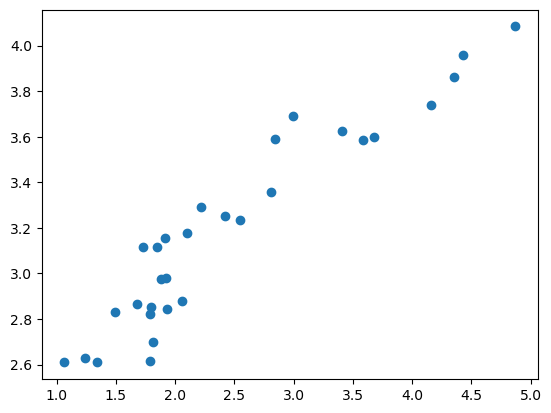

In [31]:
plt.scatter(result["India energy/cropland"], crop_yield_df["India Rice Yield"])

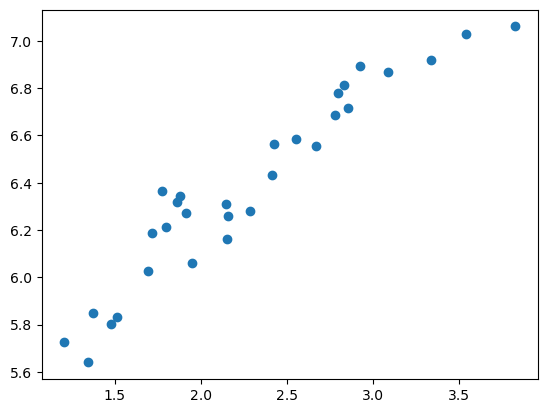

In [32]:
plt.scatter(result["China energy/cropland"], crop_yield_df["China Rice Yield"])

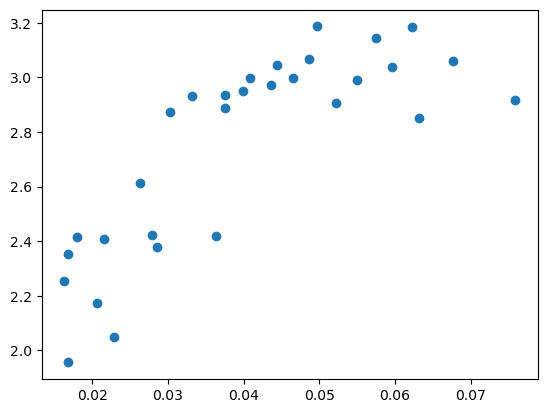

In [33]:
plt.scatter(result["Thailand energy/cropland"], crop_yield_df["Thailand Rice Yield"])

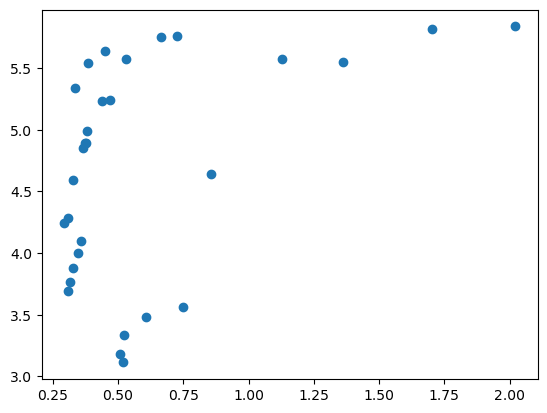

In [34]:
plt.scatter(result["Vietnam energy/cropland"], crop_yield_df["Vietnam Rice Yield"])